## Predicting Flight Delays
### Exploratory Data Analysis
Team: Ali, Khaildyn, Mobola
## Task 9


In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

%matplotlib inline

In [2]:
# Read files
flights_df = pd.read_csv("data/flights.csv")
passengers_df = pd.read_csv("data/passengers.csv")

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [3]:
orig_flights = flights_df.filter(['origin', 'fl_date'])
flights_name = flights_df[(flights_df['origin'] == 'ATL') | (flights_df['origin'] == 'LAX')| (flights_df['origin'] == 'ORD')| (flights_df['origin'] == 'DFW')| (flights_df['origin'] == 'DEN')| (flights_df['origin'] == 'JFK')| (flights_df['origin'] == 'SFO')| (flights_df['origin'] == 'LAS')| (flights_df['origin'] == 'SEA')| (flights_df['origin'] == 'MCO')]
flights_name = flights_name.groupby('origin')['fl_date'].count().sort_values(ascending=False).head(10)
flights_name

origin
ATL    9760
ORD    9545
DFW    7309
DEN    6728
LAX    6171
SEA    4803
SFO    4336
LAS    4099
MCO    3474
JFK    3187
Name: fl_date, dtype: int64

In [4]:
passengers_df.groupby('origin')['passengers'].sum().sort_values(ascending=False)


origin
ATL    21594409.0
LAX    17060595.0
ORD    16595760.0
DFW    14400548.0
DEN    13051456.0
          ...    
MCF           0.0
ILN           0.0
SQA           0.0
SBD           0.0
LGG           0.0
Name: passengers, Length: 1640, dtype: float64

In [5]:
passengers_origin = pd.DataFrame(passengers_df.groupby('origin')['passengers'].sum().reset_index()).rename({'passengers': 'total_passengers'}, axis=1)
passengers_origin = passengers_origin.sort_values(by='total_passengers', ascending=False).head(10)

/Users/foreverrefugee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


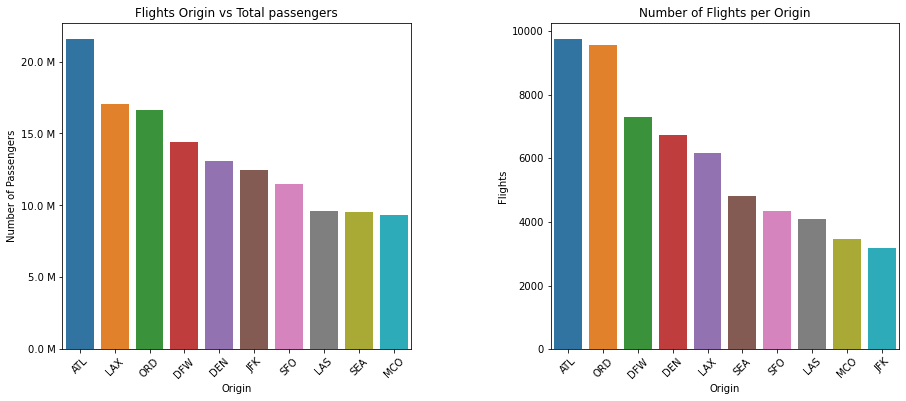

In [6]:
import matplotlib.ticker as ticker
@ticker.FuncFormatter
def million_formatter(x, pos):
    return "%.1f M" % (x/1E6)
f, axes = plt.subplots(1, 2, figsize=(15,6))
ax1 = sns.barplot(x='origin', y='total_passengers', data=passengers_origin, ax=axes[0], palette="tab10")
ax1.yaxis.set_major_formatter(million_formatter)
ax1.tick_params(axis='x', rotation=45)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
ax2 = sns.barplot(flights_name.index, flights_name.values,ax=axes[1])
plt.xticks(rotation=45)
ax1.set(title='Flights Origin vs Total passengers', xlabel='Origin', ylabel='Number of Passengers')
ax2.set(title='Number of Flights per Origin', xlabel='Origin', ylabel='Flights');